In [1]:
import sys
sys.path.append('src/')
sys.path.append('scripts/')

In [2]:
import os
import torchvision.datasets as datasets
import torch
import torch
import logging
from pythae.models import LVAE_IAF, LVAE_IAF_Config, AutoModel
from pythae.trainers import BaseTrainerConfig, BaseTrainer
import argparse
import numpy as np
import matplotlib.pyplot as plt

from utils import Encoder_ColorMNIST, Encoder_Chairs, Decoder_ColorMNIST, Decoder_Chairs, Encoder_Faces, Decoder_Faces, My_Dataset, My_MaskedDataset, make_batched_masks

In [6]:
!ls

experiments.ipynb  my_data  pyproject.toml  requirements.txt  setup.cfg  src
MANIFEST.in	   plots    README.md	    scripts	      setup.py


In [16]:
train_data = torch.load(os.path.join('my_data/sprites/Sprites_train.pt'))[:-1000]
eval_data = torch.load(os.path.join('my_data/sprites/Sprites_train.pt'), map_location="cpu")[-1000:]
test_data = torch.load(os.path.join('my_data/sprites/Sprites_test.pt'), map_location="cpu")
print(train_data.shape)
train_data = train_data.permute(0, 1, 4, 2, 3)
eval_data = eval_data.permute(0, 1, 4, 2, 3)
test_data = test_data.permute(0, 1, 4, 2, 3)
print(train_data.shape)

torch.Size([8000, 8, 64, 64, 3])


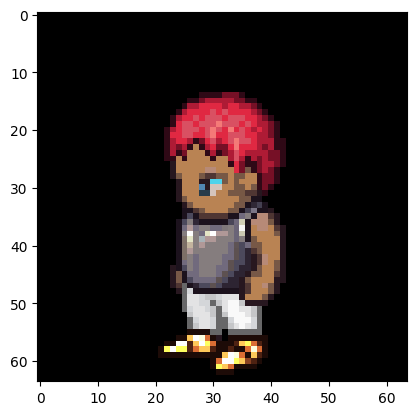

In [18]:
plt.imshow(train_data[0, 0].permute(1, 2, 0))

In [19]:
input_dim = (3, 64, 64)
latent_dim = 16
beta = 1
n_hidden_in_made = 3
n_made_blocks = 2
warmup = 10
context_dim = None
prior = 'vamp'
posterior = 'iaf'
vamp_number_components= 500
linear_scheduling_steps = 10
num_epochs = 200
batch_size = 64
learning_rate=  1e-3 
steps_saving = None
steps_predict = 100
shuffle_data = True


In [20]:
config = LVAE_IAF_Config(
    input_dim=input_dim,
    n_obs_per_ind=train_data.shape[1],
    latent_dim=latent_dim,
    beta=beta,
    n_hidden_in_made=n_hidden_in_made,
    n_made_blocks=n_made_blocks,
    warmup=warmup,
    context_dim=context_dim,
    prior=prior,
    posterior=posterior,
    vamp_number_components=vamp_number_components,
    linear_scheduling_steps=linear_scheduling_steps
)

training_config = BaseTrainerConfig(
        num_epochs=num_epochs,
        learning_rate=learning_rate,
        batch_size=batch_size,
        steps_saving=steps_saving,
        steps_predict=steps_predict,
        shuffle=shuffle_data
    )

In [21]:
encoder = Encoder_Chairs(config)
decoder = Decoder_Chairs(config)

model = LVAE_IAF(config, encoder, decoder).to('cuda')

### Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=training_config.learning_rate, eps=1e-4)

### Scheduler
scheduler = torch.optim.lr_scheduler.MultiStepLR(
    optimizer,
    milestones=[50, 100, 125, 150],
    gamma=0.5,
    verbose=True
)

/users/eleves-a/2020/meilame.tayebjee/miniconda3/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [22]:
train_seq_mask = torch.ones(train_data.shape[:2], requires_grad=False).type(torch.bool)
eval_seq_mask = torch.ones(eval_data.shape[:2], requires_grad=False).type(torch.bool)
test_seq_mask = torch.ones(test_data.shape[:2], requires_grad=False).type(torch.bool)
train_pix_mask = torch.ones_like(train_data, requires_grad=False).type(torch.bool)
eval_pix_mask = torch.ones_like(eval_data, requires_grad=False).type(torch.bool)
test_pix_mask = torch.ones_like(test_data, requires_grad=False).type(torch.bool)

train_dataset = My_MaskedDataset(train_data, train_seq_mask, train_pix_mask)
eval_dataset = My_MaskedDataset(eval_data, eval_seq_mask, eval_pix_mask)
test_dataset = My_MaskedDataset(test_data, test_seq_mask, test_pix_mask)




In [23]:
trainer = BaseTrainer(
            model=model,
            train_dataset=train_dataset,
            eval_dataset=eval_dataset,
            training_config=training_config,
            optimizer=optimizer,
            scheduler=scheduler,
        )

trainer.train()

Eval of epoch 106/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 24.0244
Eval loss: 22.7068
--------------------------------------------------------------------------


Training of epoch 107/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 107/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 23.4274
Eval loss: 22.7467
--------------------------------------------------------------------------


Training of epoch 108/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 108/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 23.2587
Eval loss: 25.3018
--------------------------------------------------------------------------


Training of epoch 109/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 109/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.5341
Eval loss: 23.1588
--------------------------------------------------------------------------


Training of epoch 110/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 110/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 23.6991
Eval loss: 24.4259
--------------------------------------------------------------------------


Training of epoch 111/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 111/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 23.0972
Eval loss: 22.8696
--------------------------------------------------------------------------


Training of epoch 112/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 112/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 23.0296
Eval loss: 22.9215
--------------------------------------------------------------------------


Training of epoch 113/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 113/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 24.1867
Eval loss: 22.5948
--------------------------------------------------------------------------


Training of epoch 114/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 114/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 23.0029
Eval loss: 23.4396
--------------------------------------------------------------------------


Training of epoch 115/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 115/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 23.1897
Eval loss: 24.24
--------------------------------------------------------------------------


Training of epoch 116/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 116/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 23.1971
Eval loss: 22.6778
--------------------------------------------------------------------------


Training of epoch 117/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 117/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 23.2292
Eval loss: 21.9475
--------------------------------------------------------------------------


Training of epoch 118/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 118/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 23.0699
Eval loss: 23.8827
--------------------------------------------------------------------------


Training of epoch 119/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 119/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 23.4726
Eval loss: 22.7613
--------------------------------------------------------------------------


Training of epoch 120/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 120/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.8974
Eval loss: 22.9439
--------------------------------------------------------------------------


Training of epoch 121/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 121/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 23.5833
Eval loss: 24.2675
--------------------------------------------------------------------------


Training of epoch 122/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 122/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.7057
Eval loss: 23.1004
--------------------------------------------------------------------------


Training of epoch 123/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 123/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 23.1229
Eval loss: 23.1143
--------------------------------------------------------------------------


Training of epoch 124/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 124/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 23.3001
Eval loss: 22.2683
--------------------------------------------------------------------------


Training of epoch 125/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 125/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 23.468
Eval loss: 22.203
--------------------------------------------------------------------------


Training of epoch 126/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 126/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.9246
Eval loss: 24.5533
--------------------------------------------------------------------------


Training of epoch 127/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 127/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.7298
Eval loss: 22.8471
--------------------------------------------------------------------------


Training of epoch 128/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 128/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.5829
Eval loss: 22.6468
--------------------------------------------------------------------------


Training of epoch 129/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 129/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 23.3485
Eval loss: 21.0233
--------------------------------------------------------------------------


Training of epoch 130/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 130/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.0311
Eval loss: 21.7364
--------------------------------------------------------------------------


Training of epoch 131/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 131/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.9181
Eval loss: 20.8958
--------------------------------------------------------------------------


Training of epoch 132/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 132/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.093
Eval loss: 21.87
--------------------------------------------------------------------------


Training of epoch 133/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 133/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.5708
Eval loss: 21.9149
--------------------------------------------------------------------------


Training of epoch 134/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 134/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 23.6008
Eval loss: 24.1841
--------------------------------------------------------------------------


Training of epoch 135/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 135/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.8013
Eval loss: 21.0235
--------------------------------------------------------------------------


Training of epoch 136/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 136/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.6795
Eval loss: 21.7973
--------------------------------------------------------------------------


Training of epoch 137/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 137/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.5576
Eval loss: 21.5686
--------------------------------------------------------------------------


Training of epoch 138/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 138/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.4187
Eval loss: 22.8963
--------------------------------------------------------------------------


Training of epoch 139/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 139/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.1021
Eval loss: 20.7841
--------------------------------------------------------------------------


Training of epoch 140/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 140/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 23.0354
Eval loss: 23.3298
--------------------------------------------------------------------------


Training of epoch 141/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 141/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.6744
Eval loss: 24.4754
--------------------------------------------------------------------------


Training of epoch 142/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 142/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.3217
Eval loss: 21.5224
--------------------------------------------------------------------------


Training of epoch 143/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 143/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 21.9981
Eval loss: 21.6744
--------------------------------------------------------------------------


Training of epoch 144/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 144/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.2018
Eval loss: 21.6127
--------------------------------------------------------------------------


Training of epoch 145/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 145/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 23.0533
Eval loss: 22.2765
--------------------------------------------------------------------------


Training of epoch 146/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 146/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.0574
Eval loss: 22.4804
--------------------------------------------------------------------------


Training of epoch 147/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 147/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.2006
Eval loss: 21.7375
--------------------------------------------------------------------------


Training of epoch 148/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 148/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.8808
Eval loss: 20.8364
--------------------------------------------------------------------------


Training of epoch 149/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 149/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.5079
Eval loss: 20.8846
--------------------------------------------------------------------------


Training of epoch 150/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 150/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.0215
Eval loss: 20.8102
--------------------------------------------------------------------------


Training of epoch 151/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 151/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.4078
Eval loss: 21.8686
--------------------------------------------------------------------------


Training of epoch 152/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 152/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.4897
Eval loss: 23.0957
--------------------------------------------------------------------------


Training of epoch 153/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 153/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.1921
Eval loss: 22.3043
--------------------------------------------------------------------------


Training of epoch 154/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 154/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.3643
Eval loss: 22.0416
--------------------------------------------------------------------------


Training of epoch 155/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 155/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 21.7691
Eval loss: 23.7385
--------------------------------------------------------------------------


Training of epoch 156/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 156/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.0393
Eval loss: 22.1354
--------------------------------------------------------------------------


Training of epoch 157/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 157/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 21.6619
Eval loss: 20.3458
--------------------------------------------------------------------------


Training of epoch 158/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 158/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.0392
Eval loss: 22.5216
--------------------------------------------------------------------------


Training of epoch 159/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 159/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 21.2552
Eval loss: 22.4033
--------------------------------------------------------------------------


Training of epoch 160/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 160/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 21.1895
Eval loss: 21.3247
--------------------------------------------------------------------------


Training of epoch 161/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 161/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 21.2283
Eval loss: 20.3463
--------------------------------------------------------------------------


Training of epoch 162/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 162/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.2081
Eval loss: 20.4329
--------------------------------------------------------------------------


Training of epoch 163/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 163/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.2371
Eval loss: 21.7713
--------------------------------------------------------------------------


Training of epoch 164/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 164/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 21.7478
Eval loss: 21.5207
--------------------------------------------------------------------------


Training of epoch 165/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 165/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 21.4253
Eval loss: 23.9068
--------------------------------------------------------------------------


Training of epoch 166/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 166/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.183
Eval loss: 23.0447
--------------------------------------------------------------------------


Training of epoch 167/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 167/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.1688
Eval loss: 22.2121
--------------------------------------------------------------------------


Training of epoch 168/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 168/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 21.815
Eval loss: 20.4655
--------------------------------------------------------------------------


Training of epoch 169/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 169/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.2125
Eval loss: 21.9504
--------------------------------------------------------------------------


Training of epoch 170/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 170/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.5875
Eval loss: 22.9078
--------------------------------------------------------------------------


Training of epoch 171/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 171/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 21.5946
Eval loss: 22.3448
--------------------------------------------------------------------------


Training of epoch 172/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 172/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.0663
Eval loss: 22.5435
--------------------------------------------------------------------------


Training of epoch 173/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 173/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.4354
Eval loss: 21.0104
--------------------------------------------------------------------------


Training of epoch 174/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 174/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.4706
Eval loss: 23.911
--------------------------------------------------------------------------


Training of epoch 175/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 175/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.3605
Eval loss: 21.2735
--------------------------------------------------------------------------


Training of epoch 176/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 176/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 21.0082
Eval loss: 23.408
--------------------------------------------------------------------------


Training of epoch 177/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 177/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.2733
Eval loss: 23.9953
--------------------------------------------------------------------------


Training of epoch 178/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 178/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.0233
Eval loss: 21.2992
--------------------------------------------------------------------------


Training of epoch 179/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 179/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 21.5373
Eval loss: 21.6297
--------------------------------------------------------------------------


Training of epoch 180/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 180/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.1069
Eval loss: 21.9345
--------------------------------------------------------------------------


Training of epoch 181/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 181/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.2487
Eval loss: 21.8565
--------------------------------------------------------------------------


Training of epoch 182/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 182/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 21.9845
Eval loss: 21.5481
--------------------------------------------------------------------------


Training of epoch 183/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 183/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.3545
Eval loss: 22.3247
--------------------------------------------------------------------------


Training of epoch 184/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 184/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 21.6023
Eval loss: 22.4004
--------------------------------------------------------------------------


Training of epoch 185/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 185/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 21.368
Eval loss: 20.106
--------------------------------------------------------------------------


Training of epoch 186/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 186/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 21.7807
Eval loss: 21.3897
--------------------------------------------------------------------------


Training of epoch 187/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 187/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 21.8777
Eval loss: 21.8749
--------------------------------------------------------------------------


Training of epoch 188/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 188/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 21.5924
Eval loss: 21.866
--------------------------------------------------------------------------


Training of epoch 189/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 189/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 21.3857
Eval loss: 22.2917
--------------------------------------------------------------------------


Training of epoch 190/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 190/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 20.8972
Eval loss: 22.4301
--------------------------------------------------------------------------


Training of epoch 191/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 191/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 21.7975
Eval loss: 22.4558
--------------------------------------------------------------------------


Training of epoch 192/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 192/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 21.634
Eval loss: 20.2843
--------------------------------------------------------------------------


Training of epoch 193/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 193/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 21.3206
Eval loss: 21.4605
--------------------------------------------------------------------------


Training of epoch 194/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 194/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 21.716
Eval loss: 21.0086
--------------------------------------------------------------------------


Training of epoch 195/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 195/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 21.536
Eval loss: 20.8098
--------------------------------------------------------------------------


Training of epoch 196/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 196/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 21.5482
Eval loss: 22.0183
--------------------------------------------------------------------------


Training of epoch 197/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 197/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.3212
Eval loss: 21.072
--------------------------------------------------------------------------


Training of epoch 198/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 198/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 22.0388
Eval loss: 22.4221
--------------------------------------------------------------------------


Training of epoch 199/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 199/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 21.699
Eval loss: 21.9835
--------------------------------------------------------------------------


Training of epoch 200/200:   0%|          | 0/125 [00:00<?, ?batch/s]

Eval of epoch 200/200:   0%|          | 0/16 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 21.6525
Eval loss: 24.2118
--------------------------------------------------------------------------


vamp prior
torch.Size([10, 8, 3, 64, 64])


Training ended!
Saved final model in dummy_output_dir/LVAE_IAF_training_2024-05-01_17-22-06/final_model


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([8, 3, 64, 64])


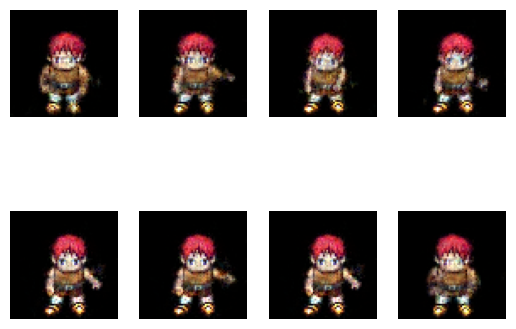

In [32]:
z = torch.randn((1, latent_dim)).to('cuda')
out = model.generate(z).squeeze(0)
print(out.shape)
for i in range(model.n_obs):
    plt.subplot(2, model.n_obs//2, i+1)
    img = out[i].detach().cpu().numpy()
    plt.imshow(img.transpose(1, 2, 0))
    plt.axis('off')
plt.show()
